### 1. Dane kategoryczne - wizualizacja

Tło: \
Posiadasz dane z lodziarni, która działa w Warszawie, Krakowie i Gdańsku.

Dane: \
W Warszawie sprzedano 12 327 lodów w Krakowie 17 129, a w Gdańsku 19 923.

Zadanie: \
Zaprezentuj dane w postaci tabeli rozkładu częstości, wykresie słupkowym, wykresie kołowym, digramie Pareto.

In [1]:
# Dane

sales = {
    "Warszawa": 12327, 
    "Krakow": 17129, 
    "Gdansk": 19923
}

In [2]:
# Tabela rozkładu częstości

import pandas as pd

# Zmiana słownika na DataFrame
df = pd.DataFrame(list(sales.items()), columns=["city", "count"])

# Ustawienie kolumny "city" jako indeks
df.set_index("city", inplace=True)

# Obliczenie całkowitej sprzedaży
total_sales = df["count"].sum()

# Dodanie kolumny 'freq' z względną częstością sprzedaży
df["freq"] = round(df["count"] / total_sales, 2)

# Wyświetlenie DataFrame
df

,count,freq
city,,
Warszawa,12327,0.25
Krakow,17129,0.35
Gdansk,19923,0.40


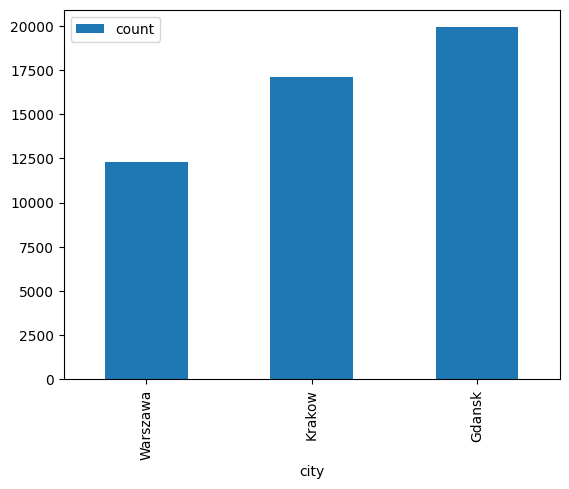

In [3]:
# Wykres słupkowy pionowy
df.plot(kind='bar', y='count');

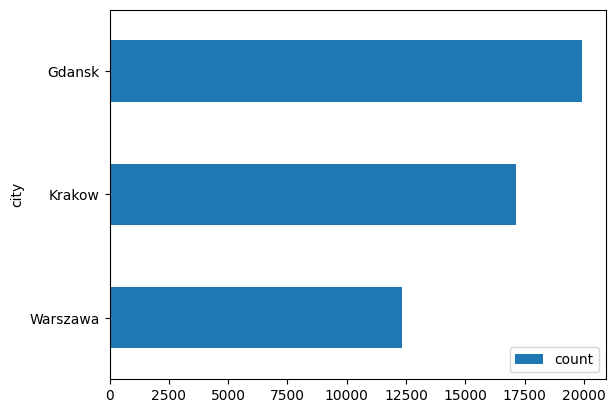

In [4]:
# Wykres słupkowy poziomy
df.plot(kind='barh', y='count');

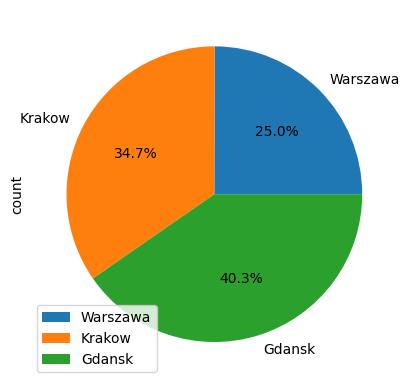

In [5]:
# Wykres kołowy
df.plot(kind='pie', y='count', autopct='%1.1f%%');

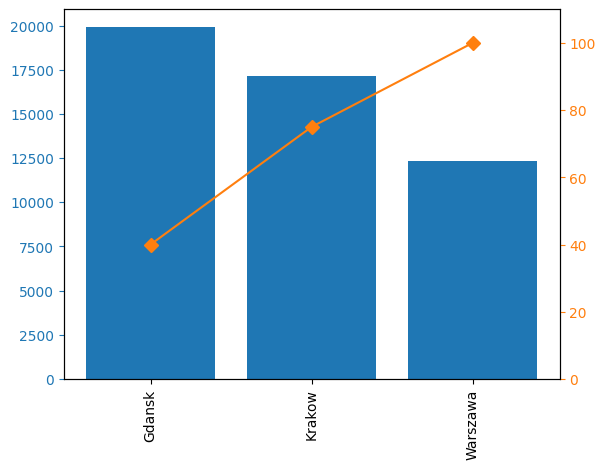

In [6]:
# Diagram Pareto
import matplotlib.pyplot as plt

# Sortowanie od największej do najmniejszej
sorted_df = df.sort_values(by='count', ascending=False)

bar_plot_data = sorted_df['count']
cumulant_data = sorted_df['freq'].cumsum()*100

# Tworzymy pierwszy wykres - wykres słupkowy
fig, ax = plt.subplots()
ax.bar(bar_plot_data.index, bar_plot_data, color="C0")
ax.tick_params(axis="x", labelrotation=90)

# Tworzymy drugi wykres - wykres liniowy z inną osią Y
ax2 = ax.twinx()
ax2.set_ylim(0, 110)  # bez tego prawa oś y jest nieproporcjonalna (50 jest w jednej trzeciej 100)
ax2.plot(cumulant_data.index, cumulant_data, color="C1", marker="D", ms=7)
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

plt.show()